In [52]:
import pandas as pd
import numpy as np

early_access = pd.read_csv('../data/early_access.csv')
early_access.head()
#pd.read_csv(file, index_col=0, parse_dates=True)

,rank,Game,Release date,Price,Score rank(Userscore / Metascore),Owners,Playtime (Median),Developer(s),Publisher(s)
0,1560,Paladins,"Sep 15, 2016",Free,62% (86%),"14,292,767 ±109,214",20:34 (04:14),Hi-Rez Studios,Hi-Rez Studios
1,1275,PLAYERUNKNOWN'S BATTLEGROUNDS,"Mar 23, 2017",$29.99,24% (67%),"12,735,911 ±103,275",98:40 (53:21),"Bluehole, Inc.","Bluehole, Inc."
2,126,Brawlhalla,"Apr 30, 2014",Free,62% (86%),"7,613,125 ±80,303",13:34 (02:18),Blue Mammoth Games,Blue Mammoth Games
3,561,H1Z1: King of the Kill,"Feb 17, 2016",$19.99,19% (62%),"7,365,623 ±79,009",86:47 (19:38),Daybreak Game Company,Daybreak Game Company
4,890,Rust,"Dec 11, 2013",$19.99,47% (80%),"6,067,079 ±71,810",113:06 (25:01),Facepunch Studios,Facepunch Studios


In [53]:
games = pd.read_csv('../data/games.csv')
games.head()

,appid,name
0,5,Dedicated Server
1,7,Steam Client
2,8,winui2
3,10,Counter-Strike
4,20,Team Fortress Classic


In [54]:
early_access.columns = ['Rank', 'name', 'Release date', 'Price', 'Score rank(Userscore/Metascore)', 'Owners', 'Playtime(Median)', 'Developer(s)', 'Publisher(s)']
early_access.head()

,Rank,name,Release date,Price,Score rank(Userscore/Metascore),Owners,Playtime(Median),Developer(s),Publisher(s)
0,1560,Paladins,"Sep 15, 2016",Free,62% (86%),"14,292,767 ±109,214",20:34 (04:14),Hi-Rez Studios,Hi-Rez Studios
1,1275,PLAYERUNKNOWN'S BATTLEGROUNDS,"Mar 23, 2017",$29.99,24% (67%),"12,735,911 ±103,275",98:40 (53:21),"Bluehole, Inc.","Bluehole, Inc."
2,126,Brawlhalla,"Apr 30, 2014",Free,62% (86%),"7,613,125 ±80,303",13:34 (02:18),Blue Mammoth Games,Blue Mammoth Games
3,561,H1Z1: King of the Kill,"Feb 17, 2016",$19.99,19% (62%),"7,365,623 ±79,009",86:47 (19:38),Daybreak Game Company,Daybreak Game Company
4,890,Rust,"Dec 11, 2013",$19.99,47% (80%),"6,067,079 ±71,810",113:06 (25:01),Facepunch Studios,Facepunch Studios


In [55]:
early_access_merged = pd.merge(games, early_access, on='name', how='inner')
early_access_merged.head()

,appid,name,Rank,Release date,Price,Score rank(Userscore/Metascore),Owners,Playtime(Median),Developer(s),Publisher(s)
0,15540,1... 2... 3... KICK IT! (Drop That Beat Like a...,876,NaN,$9.99,2% (31%),"104,271 ±9,475",01:51 (00:33),"Dejobaan Games, LLC","Dejobaan Games, LLC"
1,25000,Overgrowth,1375,NaN,$29.99,35% (74%),"252,007 ±14,728",07:17 (02:58),Wolfire,Wolfire
2,72200,Universe Sandbox,939,"Aug 24, 2015",$24.99,86% (93%),"307,408 ±16,266",13:15 (03:17),Giant Army,Giant Army
3,80776,Universe Sandbox,939,"Aug 24, 2015",$24.99,86% (93%),"307,408 ±16,266",13:15 (03:17),Giant Army,Giant Army
4,108600,Project Zomboid,1086,"Nov 8, 2013",$14.99,65% (87%),"865,696 ±27,280",22:30 (06:14),The Indie Stone,The Indie Stone


In [56]:
ex_early_access = pd.read_csv('../data/ex_early_access.csv')
ex_early_access.head()

,rank,Game,Release date,Price,Score rank(Userscore / Metascore),Owners,Players,Playtime (Median),Developer(s),Publisher(s)
0,3,Unturned,"Jul 7, 2017",Free,77% (91%),"32,727,993 ±161,809","26,277,162 ±146,079",20:46 (02:40),Smartly Dressed Games,Smartly Dressed Games
1,7,Heroes & Generals,"Oct 18, 2016",Free,23% (66%),"15,750,082 ±114,459","11,175,000 ±96,908",12:48 (00:51),Reto-Moto,Reto-Moto
2,6,Robocraft,"Aug 24, 2017",Free,32% (72%),"13,418,063 ±105,923","9,778,041 ±90,790",19:12 (02:19),Freejam,Freejam
3,106,ARK: Survival Of The Fittest,"Aug 29, 2017",Free,21% (64%),"7,408,637 ±79,235","1,958,401 ±40,983",03:44 (00:24),"Studio Wildcard, Instinct Games, Efecto Studio...",Studio Wildcard
4,5,Don't Starve Together,"Apr 21, 2016",$14.99,95% (96%/83%),"6,782,336 ±75,865","5,443,030 ±68,063",25:52 (08:40),Klei Entertainment,Klei Entertainment


In [57]:
ex_early_access.columns = ['Rank', 'name', 'Release date', 'Price', 'Score rank(Userscore/Metascore)', 'Owners', 'Players', 'Playtime(Median)', 'Developer(s)', 'Publisher(s)']
ex_early_access.head()

,Rank,name,Release date,Price,Score rank(Userscore/Metascore),Owners,Players,Playtime(Median),Developer(s),Publisher(s)
0,3,Unturned,"Jul 7, 2017",Free,77% (91%),"32,727,993 ±161,809","26,277,162 ±146,079",20:46 (02:40),Smartly Dressed Games,Smartly Dressed Games
1,7,Heroes & Generals,"Oct 18, 2016",Free,23% (66%),"15,750,082 ±114,459","11,175,000 ±96,908",12:48 (00:51),Reto-Moto,Reto-Moto
2,6,Robocraft,"Aug 24, 2017",Free,32% (72%),"13,418,063 ±105,923","9,778,041 ±90,790",19:12 (02:19),Freejam,Freejam
3,106,ARK: Survival Of The Fittest,"Aug 29, 2017",Free,21% (64%),"7,408,637 ±79,235","1,958,401 ±40,983",03:44 (00:24),"Studio Wildcard, Instinct Games, Efecto Studio...",Studio Wildcard
4,5,Don't Starve Together,"Apr 21, 2016",$14.99,95% (96%/83%),"6,782,336 ±75,865","5,443,030 ±68,063",25:52 (08:40),Klei Entertainment,Klei Entertainment


In [58]:
ex_early_access_merged = pd.merge(games, ex_early_access, on='name', how='inner')
ex_early_access_merged.head()

,appid,name,Rank,Release date,Price,Score rank(Userscore/Metascore),Owners,Players,Playtime(Median),Developer(s),Publisher(s)
0,107410,Arma 3,4,"Sep 12, 2013",$39.99,74% (90%/74%),"3,609,169 ±55,535","3,514,807 ±54,810",182:14 (33:59),Bohemia Interactive,Bohemia Interactive
1,202090,Magicka: Wizard Wars,359,"Apr 28, 2015",Free,N/A (N/A/69%),"3,669,749 ±55,996","2,008,171 ±41,498",03:50 (00:48),Paradox North,Paradox Interactive
2,207140,SpeedRunners,25,"Apr 19, 2016",$14.99,89% (94%/84%),"1,659,776 ±37,741","1,436,371 ±35,118",10:59 (04:24),DoubleDutch Games,tinyBuild
3,211820,Starbound,10,"Jul 22, 2016",$14.99,74% (90%/81%),"3,026,333 ±50,886","2,938,052 ±50,143",55:48 (25:56),Chucklefish,Chucklefish
4,214420,Gear Up,138,"Jan 28, 2015",Free,35% (74%),"2,504,303 ±46,316","1,769,902 ±38,968",02:43 (00:23),Doctor Entertainment AB,Doctor Entertainment AB


### Added the column for 'is early access' and set values to True or False respectively. Combined the tables, early_access_merged with ex_early_access_merged to have all the info in one table

In [59]:
early_access_merged['is early access?'] = True
ex_early_access_merged['is early access?'] = False

full_table = pd.merge(early_access_merged, ex_early_access_merged, how='outer')
full_table.to_pickle('../data/early_access pickle')
full_table.head()

,appid,name,Rank,Release date,Price,Score rank(Userscore/Metascore),Owners,Playtime(Median),Developer(s),Publisher(s),is early access?,Players
0,15540,1... 2... 3... KICK IT! (Drop That Beat Like a...,876,NaN,$9.99,2% (31%),"104,271 ±9,475",01:51 (00:33),"Dejobaan Games, LLC","Dejobaan Games, LLC",True,NaN
1,25000,Overgrowth,1375,NaN,$29.99,35% (74%),"252,007 ±14,728",07:17 (02:58),Wolfire,Wolfire,True,NaN
2,72200,Universe Sandbox,939,"Aug 24, 2015",$24.99,86% (93%),"307,408 ±16,266",13:15 (03:17),Giant Army,Giant Army,True,NaN
3,80776,Universe Sandbox,939,"Aug 24, 2015",$24.99,86% (93%),"307,408 ±16,266",13:15 (03:17),Giant Army,Giant Army,True,NaN
4,108600,Project Zomboid,1086,"Nov 8, 2013",$14.99,65% (87%),"865,696 ±27,280",22:30 (06:14),The Indie Stone,The Indie Stone,True,NaN


In [60]:
#In the Price column, the $ sign was removed and made Free into 0 so that it would be easier to manipulate data
ex_early_access_merged['Price'] = ex_early_access_merged['Price'].str.replace('$', '')
ex_early_access_merged['Price'] = ex_early_access_merged['Price'].str.replace('Free', '0')

In [93]:
#Converting all values in Price column into numeric values 
ex_early_access_merged['Price'] = pd.to_numeric(ex_early_access_merged['Price'], errors='coerce')
print ex_early_access_merged['Price'].head()

0    39.99
1     0.00
2    14.99
3    14.99
4     0.00
Name: Price, dtype: float64


In [94]:
ex_early_access_merged

,appid,name,Rank,Release date,Price,Score rank(Userscore/Metascore),Owners,Players,Playtime(Median),Developer(s),Publisher(s),is early access?
0,107410,Arma 3,4,"Sep 12, 2013",39.99,74% (90%/74%),"3,609,169 ±55,535","3,514,807 ±54,810",182:14 (33:59),Bohemia Interactive,Bohemia Interactive,False
1,202090,Magicka: Wizard Wars,359,"Apr 28, 2015",0.00,N/A (N/A/69%),"3,669,749 ±55,996","2,008,171 ±41,498",03:50 (00:48),Paradox North,Paradox Interactive,False
2,207140,SpeedRunners,25,"Apr 19, 2016",14.99,89% (94%/84%),"1,659,776 ±37,741","1,436,371 ±35,118",10:59 (04:24),DoubleDutch Games,tinyBuild,False
3,211820,Starbound,10,"Jul 22, 2016",14.99,74% (90%/81%),"3,026,333 ±50,886","2,938,052 ±50,143",55:48 (25:56),Chucklefish,Chucklefish,False
4,214420,Gear Up,138,"Jan 28, 2015",0.00,35% (74%),"2,504,303 ±46,316","1,769,902 ±38,968",02:43 (00:23),Doctor Entertainment AB,Doctor Entertainment AB,False
5,219990,Grim Dawn,21,"Feb 25, 2016",24.99,82% (92%/83%),"1,043,159 ±29,940","955,779 ±28,662",61:21 (19:53),Crate Entertainment,Crate Entertainment,False
6,220200,Kerbal Space Program,11,"Apr 27, 2015",39.99,97% (97%/88%),"1,954,122 ±40,938","1,878,002 ±40,136",75:52 (15:35),Squad,Squad,False
7,223830,Xenonauts,152,"Jun 16, 2014",24.99,71% (89%/77%),"250,205 ±14,676","170,932 ±12,131",31:58 (09:44),Goldhawk Interactive,Goldhawk Interactive,False
8,224500,Gnomoria,145,"Feb 23, 2016",14.99,45% (79%),"283,311 ±15,616","236,242 ±14,260",24:42 (02:43),Robotronic Games,Robotronic Games,False
9,224740,Clockwork Empires,873,"Oct 26, 2016",29.99,8% (48%/58%),"20,269 ±4,178","19,593 ±4,107",16:53 (05:16),"Gaslamp Games, Inc.","Gaslamp Games, Inc.",False


In [95]:
#average price per game 
print ex_early_access_merged['Price'].mean()

10.1381294964


In [96]:
ex_early_access_merged['Rank'].replace('',np.NaN) #replaces blank with NaN
ex_early_access_merged['Rank'].max() #highest rank seems to be 1043

1043

In [97]:
ex_early_access_merged['Rank'].median() #checking to make sure it gives back a number

531.0

In [116]:
# seems the most expensive game is $65, I would think there would be a game more expensive than 65 bucks.
ex_early_access_merged['Price'].max() 

64.989999999999995

In [117]:
import matplotlib.pyplot as plt

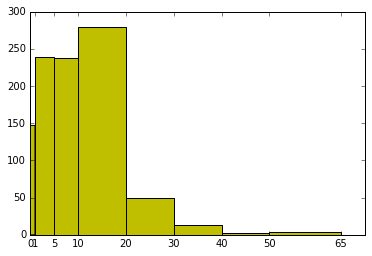

In [130]:
# This graph shows distribution of price of games in our data set 
bins= [0,1,5,10,20,30,40,50,65]
plt.hist(ex_early_access_merged.Price, bins=bins, color="y")
plt.xticks(bins)
plt.show() 